<a href="https://colab.research.google.com/github/Raghava2004-cpu/Logistic-Regression-Projects/blob/main/Sentimental_Analysis_onIMDBdataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/IMDB Dataset.csv')
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


<Axes: xlabel='sentiment', ylabel='count'>

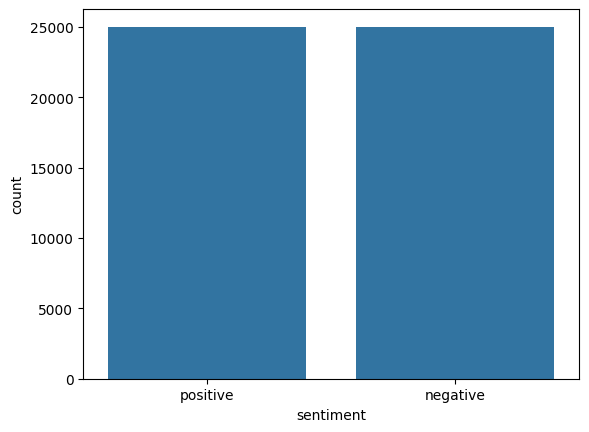

In [20]:
sns.countplot(x = data['sentiment'] , data = data)

In [21]:
data.shape

(50000, 2)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [23]:
data.drop_duplicates()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [24]:
import re
def clean_review(text):
  #text = re.sub(r'http\s+|www\s+' , '' , text)
  #text = re.sub(r'<.*?>' , '' , text)
  #text = re.sub(r'[^a-zA-Z\s]' , '' , text)
  text = re.sub(r'^\w\s' , '' , text)
  text = re.sub(r'\s+' , ' ' , text)
  text = text.lower().strip()
  return text

In [25]:
data['Cleaned Review'] = data['review'].apply(clean_review)

In [26]:
data['Cleaned Review'].head()

,Cleaned Review
0,one of the other reviewers has mentioned that ...
1,wonderful little production. <br /><br />the f...
2,thought this was a wonderful way to spend time...
3,basically there's a family where a little boy ...
4,"petter mattei's ""love in the time of money"" is..."


In [27]:
data['sentiment'] = data['sentiment'].apply(lambda x : 1 if 'positive' in x else 0)

In [28]:
data.drop(columns = ['review'] , inplace = True)

In [29]:
data.head()

,sentiment,Cleaned Review
0,1,one of the other reviewers has mentioned that ...
1,1,wonderful little production. <br /><br />the f...
2,1,thought this was a wonderful way to spend time...
3,0,basically there's a family where a little boy ...
4,1,"petter mattei's ""love in the time of money"" is..."


In [30]:
from sklearn.model_selection import train_test_split

x = data['Cleaned Review'].astype(str)
y = data['sentiment'].astype(int)

x_train , x_test , y_train , y_test = train_test_split(x , y  , test_size = 0.3 , random_state = 42)

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

vector = TfidfVectorizer()
x_train_tfidf = vector.fit_transform(x_train)
x_test_tfidf = x_test.astype(str)
x_test_tfidf = vector.transform(x_test_tfidf)

In [32]:
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression(solver = 'saga' , max_iter = 10000)
model1.fit(x_train_tfidf , y_train)

LogisticRegression(max_iter=10000, solver='saga')

In [33]:
predict = model1.predict(x_test_tfidf)

<Axes: xlabel='predict', ylabel='count'>

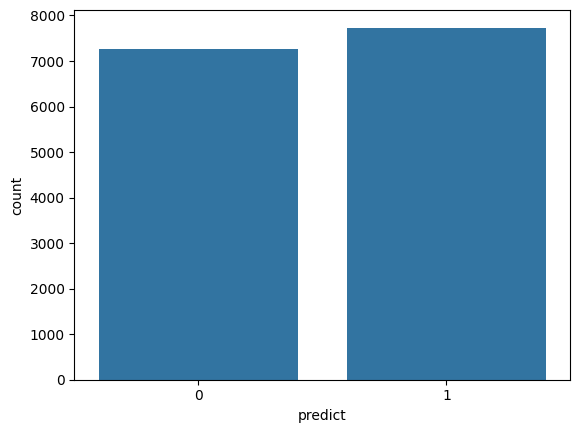

In [34]:
df = pd.DataFrame({
    'predict' : predict
})
sns.countplot(x = 'predict'  , data = df)

In [35]:
from sklearn.metrics import *

print(f"Accuracy Score : {accuracy_score(y_test , predict)*100}")
print(f"Precision Score : {precision_score(y_test , predict)*100}")
print(f"ROC AUC Score : {roc_auc_score(y_test , predict)*100}")

Accuracy Score : 89.93333333333334
Precision Score : 89.31574181865219
ROC AUC Score : 89.92068020814096


USING CROSS VALIDATION

In [36]:
from sklearn.model_selection import KFold , cross_val_score

kf = KFold(n_splits = 10 , shuffle = True , random_state = 42)

best_accuracy = 0
best_fold_data = None

new_model  = LogisticRegression(solver = 'lbfgs' , max_iter = 30000)

for fold , (train_index , test_index) in enumerate(kf.split(x)):
   x_train , x_test = x.iloc[train_index] , x.iloc[test_index]
   y_train , y_test = y.iloc[train_index] , y.iloc[test_index]

   vector = TfidfVectorizer()
   x_train_vec  = vector.fit_transform(x_train)
   x_test_vec = vector.transform(x_test)

   new_model.fit(x_train_vec , y_train)
   result = new_model.predict(x_test_vec)

   accuracy = accuracy_score(y_test , result)

   if accuracy > best_accuracy:
     best_accuracy = accuracy
     best_fold_data = (x_train , x_test , y_train , y_test)
   print(f"Accuracy Score {fold+1} : {accuracy_score(y_test , result)}")

print(f"Best Accuracy Score  : {best_accuracy*100}")
if best_fold_data:
  (x_train , x_test , y_train , y_test) = best_fold_data



Accuracy Score 1 : 0.9044
Accuracy Score 2 : 0.9006
Accuracy Score 3 : 0.9016
Accuracy Score 4 : 0.896
Accuracy Score 5 : 0.8998
Accuracy Score 6 : 0.8972
Accuracy Score 7 : 0.8952
Accuracy Score 8 : 0.901
Accuracy Score 9 : 0.888
Accuracy Score 10 : 0.9012
Best Accuracy Score  : 90.44
